In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import xgboost as xgb
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

In [2]:
# 讀檔案
df = pd.read_csv('./job7_all_clean.csv',encoding='utf-8-sig')

# df = df.dropna().reset_index(drop=True)

# pd.isna(df).sum()
# pd.isnull(df.iloc[:,0:43]).sum()
# sum(df.isnull().sum())

In [3]:
# sum(df.isnull().sum())

In [4]:
# data clean drop na 
df = df.dropna().reset_index(drop=True)
df.isnull().sum()


職缺連結        0
職缺類別        0
職位類別        0
職位          0
大職業編號       0
           ..
金旭飯店管裡系統    0
金蝶          0
鉅茂          0
鼎基-ERP      0
鼎新          0
Length: 693, dtype: int64

In [5]:
#check col num
print(df.columns)
print(len(df.columns))

Index(['職缺連結', '職缺類別', '職位類別', '職位', '大職業編號', '中職業編號', '小職業編號', '縣市', '地區',
       '縣市編碼',
       ...
       '英文打字150以上', '英文打字20~50', '英文打字20以下', '英文打字50~75', '英文打字75~100',
       '金旭飯店管裡系統', '金蝶', '鉅茂', '鼎基-ERP', '鼎新'],
      dtype='object', length=693)
693


In [6]:
# print raw data before get dummies
print((df.iloc[:,0:43]).columns)
print((df.iloc[:,193:]).columns)
#48-186(不含) 科系
#193到底 擅長工具

print(set(df["工作經歷"].values))
print(set(df["職位"].values))
print(set(df["需求人數"].values))
print(set(df["學歷要求"].values))
print(set(df["工作經歷"].values))
print(set(df['工作性質'].values))
print(set(df['工作待遇_min'].values))

Index(['職缺連結', '職缺類別', '職位類別', '職位', '大職業編號', '中職業編號', '小職業編號', '縣市', '地區',
       '縣市編碼', '地區編碼', '公司連結', '供需人數', '職缺編號', '公司名稱', '職缺名稱', '更新日期', '工作內容',
       '職務類別', '工作待遇', '工作性質', '上班地點', '管理責任', '上班時段', '需求人數', '工作經歷', '學歷要求',
       '科系要求', '擅長工具', '工作技能', '其他條件', '福利制度', '學歷分佈', '性別分佈', '工作經驗分佈',
       '年齡分佈', '語言能力分佈', '科系分佈', '技能分佈', '證照分佈', '資本額', '員工人數', '公司內文'],
      dtype='object')
Index(['3G', '3ds-Max', '3ds-Max-Design', '6-Sigma', 'A+', 'ABAQUS', 'ADA',
       'ADC', 'ADO', 'ADSL',
       ...
       '英文打字150以上', '英文打字20~50', '英文打字20以下', '英文打字50~75', '英文打字75~100',
       '金旭飯店管裡系統', '金蝶', '鉅茂', '鼎基-ERP', '鼎新'],
      dtype='object', length=500)
{'5-10年', '10年以上', '0-1年', '1-3年', '3-5年'}
{'韌體設計工程師', '電子商務技術主管', '系統維護_操作人員', 'MIS程式設計師', '資料庫管理人員', '電玩程式設計師', '網路管理工程師', 'Internet程式設計師', '資訊助理人員', '通訊軟體工程師', '軟體設計工程師', '資訊設備管制人員', '軟體專案主管', '演算法開發工程師', 'BIOS工程師', '系統分析師', 'MIS_網管主管', 'MES工程師', '網路安全分析師', '其他資訊專業人員'}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 18, 20,

In [7]:
# data engineering
# data type transformation
# 學歷要求 {'高中':1,'專科':2, '大學':3, '碩士':4, '博士':5}
# 工作經歷 {'0-1年':1, '1-3年':2, '10年以上':3, '3-5年':4, '5-10年':5}


edu_dict = {'高中':18,'專科':20, '大學':22, '碩士':25, '博士':30}
df['學歷要求'] = df['學歷要求'].map(edu_dict)
print(set(df['學歷要求'].values))


# work_exp = {'0-1年':1, '1-3年':2, '10年以上':3, '3-5年':4, '5-10年':5}
# df["工作經歷"] = df['工作經歷'].map(work_exp)
# print(set(df['工作經歷'].values))

print(set(df['工作經歷_數字'].values))


{18, 20, 22, 25, 30}
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0}


In [8]:
# select analysis data

# col_list =['職位', '縣市', '地區', '供需人數',"管理責任", '上班時段', '需求人數',\
#     '工作經歷_數字', '學歷要求', '工作待遇_min']

# 先不要 需求人數 地區 縣市 供需人數
col_list =['職位', '縣市', '地區', '供需人數', '管理責任', '上班時段', '工作經歷_數字', '學歷要求', '外商', '工作待遇_min'] 

# print(set(df['職位'].values))
print(set(df['縣市'].values))
print(set(df['地區'].values))
print(set(df['供需人數'].values))
print(set(df['管理責任'].values))
print(set(df['上班時段'].values))
print(set(df['需求人數'].values))
print(set(df['工作經歷'].values))
print(set(df['學歷要求'].values))



{'高雄市', '新竹縣', '基隆市', '澎湖縣', '宜蘭縣', '臺東縣', '彰化縣', '南投縣', '臺中市', '嘉義縣', '新竹市', '新北市', '雲林縣', '桃園市', '臺南市', '金門縣', '嘉義市', '花蓮縣', '屏東縣', '苗栗縣', '臺北市'}
{'彰化市', '大林鎮', '七堵區', '仁武區', '柳營區', '大村鄉', '橋頭區', '頭份市', '金沙鎮', '莿桐鄉', '里港鄉', '虎尾鎮', '苑裡鎮', '文山區', '梓官區', '宜蘭市', '左營區', '後龍鎮', '瑞芳區', '永安區', '中正區', '大社區', '三峽區', '板橋區', '龜山區', '泰山區', '新化區', '太平區', '鹿港鎮', '梧棲區', '南屯區', '楠梓區', '名間鄉', '鹿草鄉', '臺東市', '后里區', '仁德區', '鹽埕區', '大同區', '五股區', '員林市', '新屋區', '歸仁區', '內湖區', '大肚區', '卑南鄉', '枋寮鄉', '湖口鄉', '和美鎮', '萬華區', '西屯區', '善化區', '觀音區', '路竹區', '南港區', '蘇澳鎮', '外埔區', '前金區', '鳥松區', '八里區', '溪州鄉', '土城區', '中山區', '三民區', '豐原區', '馬公市', '太保市', '新竹市', '花壇鄉', '三芝區', '潭子區', '大園區', '新興區', '新市區', '霧峰區', '花蓮市', '龍潭區', '新莊區', '平鎮區', '屏東市', '楊梅區', '南投市', '湖內區', '新豐鄉', '大雅區', '樹林區', '新店區', '中和區', '清水區', '阿里山鄉', '阿蓮區', '南區', '桃園區', '汐止區', '鳳山區', '士林區', '吉安鄉', '斗南鎮', '公館鄉', '信義區', '蘆洲區', '寶山鄉', '水里鄉', '鶯歌區', '關廟區', '竹南鎮', '金湖鎮', '松山區', '田中鎮', '永康區', '新園鄉', '中西區', '八德區', '安樂區', '麥寮鄉', '大寮區', '麻豆區', '鹽水區', '麟洛鄉', '竹北市', '深坑區', '民雄鄉

In [9]:
# built analysis data
dfana = df.loc[:,col_list]

# reset index
dfana = dfana.reset_index(drop=True)

# get dummies
df_pst = pd.get_dummies(dfana['職位'])
df_county = pd.get_dummies(dfana['縣市'])
df_area = pd.get_dummies(dfana['地區'])
df_time = pd.get_dummies(dfana['上班時段'])



# dfana = dfana.astype({'供需人數':'int32',})

# reassign analysis data
# col_list2 =['供需人數',"管理責任",'需求人數','工作經歷', '學歷要求', '工作待遇_min']
col_list2 =['供需人數', '管理責任', '工作經歷_數字', '學歷要求', '外商', '工作待遇_min']
dfana_final = dfana.loc[:, col_list2]

#擅長工具
df_tools = (df.iloc[:,193:]).copy()
# concat other data as test version to access ML model
# df_test_select = pd.concat([dfana_final,df_pst,df_county,df_area,df_time],axis=1)

# df_test_select = pd.concat([dfana_final, df_pst, df_time],axis=1)
df_test_select = pd.concat([dfana_final, df_pst, df_county, df_area, df_time, df_tools],axis=1)

In [10]:
# drop predict data
df_test_select = df_test_select.drop(df[df["工作待遇_min"] == 'Y'].index)

# transfer specific data type to int
# example = df.astype({'col1': 'int32'}).dtypes
df_test_select = df_test_select.astype({'供需人數':'int64',"工作待遇_min":'int64'})
df_test_select = df_test_select.astype({"工作待遇_min":'int64'})

df_test_select.dtypes.head(20)


供需人數               int64
管理責任               int64
工作經歷_數字          float64
學歷要求               int64
外商                 int64
工作待遇_min           int64
BIOS工程師            uint8
Internet程式設計師      uint8
MES工程師             uint8
MIS_網管主管           uint8
MIS程式設計師           uint8
其他資訊專業人員           uint8
演算法開發工程師           uint8
系統分析師              uint8
系統維護_操作人員          uint8
網路安全分析師            uint8
網路管理工程師            uint8
資料庫管理人員            uint8
資訊助理人員             uint8
資訊設備管制人員           uint8
dtype: object

In [11]:
df_heatmap = df[['職位','外商','工作經歷_數字','縣市','地區','學歷要求','工作待遇_min']]
df_heatmap = df_heatmap.drop(df[df["工作待遇_min"] == 'Y'].index)
df_heatmap = df_heatmap.astype({"工作待遇_min":'int64'})
df_heatmap

df_heatmap_data = pd.pivot_table(df_heatmap, values='工作待遇_min',
                            index=['縣市','地區'],
                            columns='外商',fill_value=0)
df_heatmap_data.head()


外商                  0    1
縣市  地區                    
南投縣 南投市  33333.333333  0.0
    名間鄉  40000.000000  0.0
    埔里鎮  25250.000000  0.0
    水里鄉  32400.000000  0.0
    草屯鎮  40000.000000  0.0

In [12]:
import matplotlib
print(matplotlib.matplotlib_fname())
print(matplotlib.get_cachedir())

matplotlib.pyplot.rcParams['font.sans-serif']='SimHei'

C:\Users\student\AppData\Roaming\Python\Python310\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\student\.matplotlib


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
c:\Program Files\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from current font.
  func(*args, **kwargs)
c:\Program Files\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from current font.
  func(*args, **kwargs)
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
c:\Program Files\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 33274 (\N{CJK UNIFIED IDEOGRAPH-81FA}) missing from current font.
  func(*args, **kwargs)
c:\Program Files\Python310\lib\si

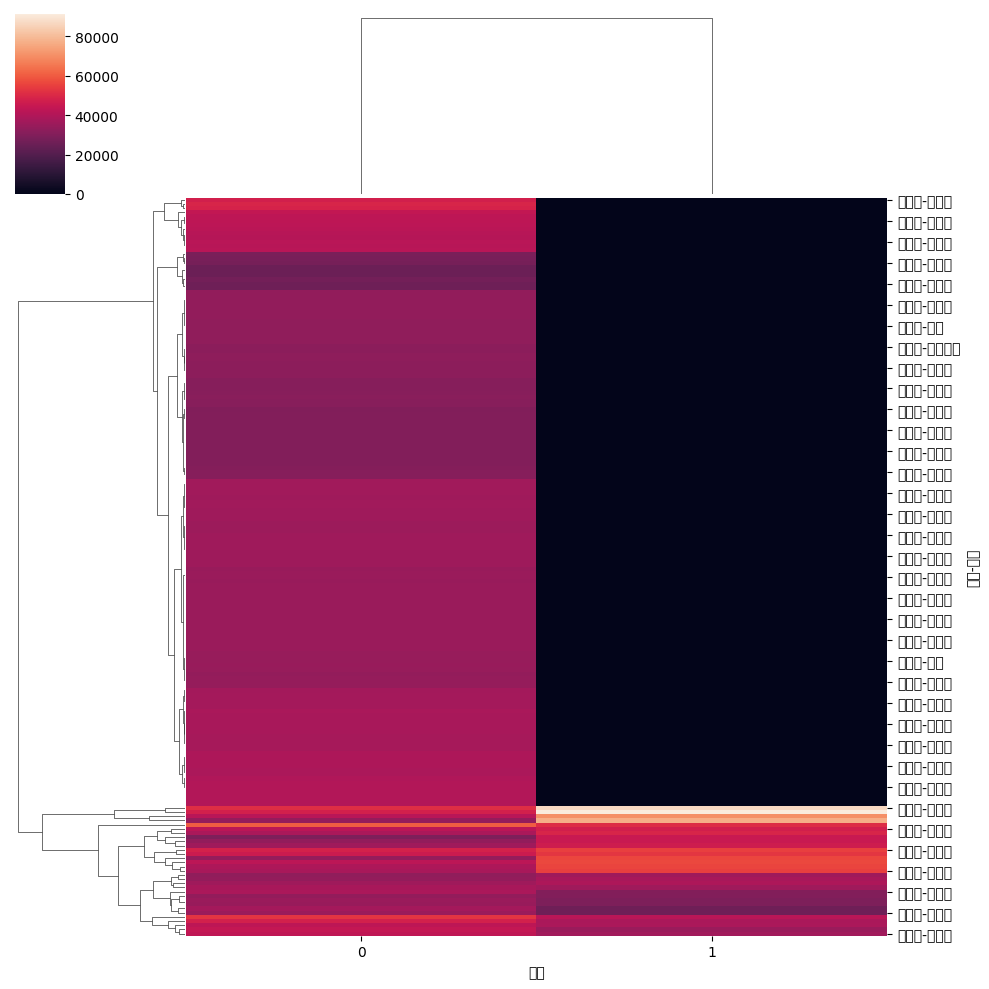

In [13]:
# make heatmap with Seaborn ClusterMap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.clustermap(df_heatmap_data)
# plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg',
#             dpi=150)

## Model training

In [14]:
# split data
y = df_test_select['工作待遇_min']
X = df_test_select.drop('工作待遇_min',axis=1).copy()
X.head()
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(X_train)


# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)


# # check data type
# print('x train data shape = ',X_train.shape)
# print('y test data shape =',X_test.shape)

       供需人數  管理責任  工作經歷_數字  學歷要求  外商  BIOS工程師  Internet程式設計師  MES工程師  \
3950      2     0      0.0    22   0        0              0       0   
9877      2     0      0.0    20   0        0              1       0   
14693    20     0      0.0    20   0        0              0       0   
3491      2     0      3.0    20   0        0              0       0   
13926     2     0      3.0    20   0        0              0       0   
...     ...   ...      ...   ...  ..      ...            ...     ...   
20608     2     0      0.0    20   0        0              0       0   
11990     2     0      1.0    22   0        0              1       0   
8023      2     0      0.0    20   0        0              0       0   
21534     2     0      2.0    20   0        0              0       0   
7173      2     0      0.0    18   0        0              0       0   

       MIS_網管主管  MIS程式設計師  ...  英文打字150以上  英文打字20~50  英文打字20以下  英文打字50~75  \
3950          0         0  ...          0          0      

In [15]:
# Lasso

model = linear_model.Lasso(alpha=0.1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Lasso\n')
print("Mean squared error: {}".format((mean_squared_error(y_test, y_pred))))
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('number of model coef: {}'.format(np.sum(model.coef_ != 0)))

Lasso

Mean squared error: 163799309.30237144
R2 score: 0.447925467012277
number of model coef: 568


C:\Users\student\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.302e+12, tolerance: 7.216e+08
  model = cd_fast.enet_coordinate_descent(


In [16]:
# Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = linear_model.Ridge(alpha=1.0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Ridge\n')
print("Mean squared error: {}".format((mean_squared_error(y_test, y_pred))))
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('number of model coef: {}'.format(np.sum(model.coef_ != 0)))

Ridge

Mean squared error: 164765204.0892469
R2 score: 0.4446699837281858
number of model coef: 599


In [17]:
# Elastic

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Elastic\n')
print("Mean squared error: {}".format((mean_squared_error(y_test, y_pred))))
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('number of model coef: {}'.format(np.sum(model.coef_ != 0)))

Elastic

Mean squared error: 153839349.50765756
R2 score: 0.48149484026337386
number of model coef: 599


In [18]:
# KNN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


model = neighbors.KNeighborsClassifier(n_neighbors=3)   # KNN K值是3
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('KNN\n')
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('confusion matrix: {}'.format(con_matrix))

KNN

number of correct sample: 1076
accuracy: 0.5337301587301587
confusion matrix: [[ 9  0  2 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]]


In [19]:
# Random Forest

os.environ["PATH"] += os.pathsep + 'C:/Users/student/Desktop/BDSE_機器學習/ands-on_part5/example/example/release/bin'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


model = RandomForestRegressor(max_depth=3, random_state=0)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)



mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print('Random Forest:')
print('R-squared: {}'.format(r2))
print('MSE: {}'.format(mse))

Random Forest:
R-squared: 0.026224688539518204
MSE: 350342638.5279702


In [21]:
# Ada Boost

from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

ensemble = BaggingRegressor(n_estimators=1000)

ensemble.fit(X_train, y_train)
predictions = ensemble.predict(X_test)

r2 = metrics.r2_score(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)

print('Gradient Boosting:')
print('R-squared: {}'.format(r2))
print('MSE: {}'.format(mse))

Gradient Boosting:
R-squared: 0.8397309036920247
MSE: 57661246.300048634


In [22]:
# XGBoost
regressor = xgb.XGBRegressor(n_estimators=2200,reg_lambda=20,gamma=0,max_depth=8)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('XG Boosting:')
print('R-squared: {}'.format(r2))
print('MSE: {}'.format(mse))

XG Boosting:
R-squared: 0.8819019925998414
MSE: 42489029.07120624


In [ ]:
# XGBoost
recipe=[4600,4700,4800,4900,5000,5100,5200,5300,5400,5500]
for i in recipe:
    regressor = xgb.XGBRegressor(n_estimators=i,reg_lambda=20,gamma=0,max_depth=8)

    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print('XG Boosting:')
    print('R-squared: {}'.format(r2))
    print('MSE: {}'.format(mse))

XG Boosting:
R-squared: 0.8935439025202896
MSE: 39177112.01444963
XG Boosting:
R-squared: 0.8935878025348661
MSE: 39160956.28613331
XG Boosting:
R-squared: 0.8935725193612332
MSE: 39166580.67608867
XG Boosting:
R-squared: 0.8935149455497237
MSE: 39187768.52456338
XG Boosting:
R-squared: 0.8934490275076273
MSE: 39212027.14929336
XG Boosting:
R-squared: 0.8934149772896224
MSE: 39224558.03513719
XG Boosting:
R-squared: 0.8934775845175358
MSE: 39201517.82946606
XG Boosting:
R-squared: 0.8934738776803433
MSE: 39202881.989710055
XG Boosting:
R-squared: 0.8935207455160769
MSE: 39185634.06785419
XG Boosting:
R-squared: 0.8931954036521932
MSE: 39305363.74934838


In [ ]:
# XGBoost
regressor = xgb.XGBRegressor(n_estimators=4500,reg_lambda=10,gamma=0,max_depth=8)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('XG Boosting:')
print('R-squared: {}'.format(r2))
print('MSE: {}'.format(mse))

#R-squared: 0.8934669990381915
#MSE: 39205413.41196267

XG Boosting:
R-squared: 0.87872864121144
MSE: 44629304.660631955


In [ ]:
recipe1=[500,1000,2000]
recipe2=[1,10,50]
recipe3=[3,4,5,6,7,8,9,10]
results=[]
for i in recipe1:
    for j in recipe2:
        for k in recipe3:
            # XGBoost
            regressor = xgb.XGBRegressor(n_estimators=i,reg_lambda=j,gamma=0,max_depth=k)
            regressor.fit(X_train, y_train)

            y_pred = regressor.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            result={
                'XG Boosting' : 'n_estimators:'+str(i)+',reg_lambda:'+str(j)+',max_depth:'+str(k) ,
                'R-squared': r2,
                'MSE:':mse
            }
            results.append(result)
            print(result)
            # print('XG Boosting:')
            # print('R-squared: {}'.format(r2))
            # print('MSE: {}'.format(mse))

{'XG Boosting': 'n_estimators:500,reg_lambda:1,max_depth:3', 'R-squared': 0.7242085979017804, 'MSE:': 101494521.29487798}
{'XG Boosting': 'n_estimators:500,reg_lambda:1,max_depth:4', 'R-squared': 0.7894680494863668, 'MSE:': 77478265.71855295}
{'XG Boosting': 'n_estimators:500,reg_lambda:1,max_depth:5', 'R-squared': 0.8191429063767588, 'MSE:': 66557564.885712184}


KeyboardInterrupt: 

In [ ]:
import json

In [ ]:
with open('XGBOOST.json', "w", encoding='utf-8') as file:
    file.write(json.dumps(results, ensure_ascii=False, indent=4))

In [ ]:
df = pd.read_json('XGBOOST.json')
df.to_csv('XGBOOST'+'.csv',
            index=None, encoding="utf_8_sig")


In [ ]:
import sklearn

print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [ ]:
from sklearn.model_selection import StratifiedKFold
kn = xgb.XGBRegressor()
params = {'n_estimators':[1000],'reg_lambda':[1],'gamma':[0],'max_depth':range(3, 10)}

scoring = ['r2','neg_mean_squared_error','neg_root_mean_squared_error']



grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        cv = 5,
                        scoring = scoring,
                        refit = 'neg_root_mean_squared_error')

grid_kn.fit(X_train, y_train)
print(grid_kn.best_score_)
print(grid_kn.best_params_)
    


-12725.137610816664
{'gamma': 0, 'max_depth': 5, 'n_estimators': 1000, 'reg_lambda': 1}


In [ ]:
print(grid_kn.best_score_)
print(grid_kn.best_params_)

-12725.137610816664
{'gamma': 0, 'max_depth': 5, 'n_estimators': 1000, 'reg_lambda': 1}


In [ ]:
kn = AdaBoostRegressor()
# params = {'n_estimators':[1000], 'base_estimator':DecisionTreeRegressor(max_depth=range(2, 11))}
params = {'n_estimators':[1000], 'base_estimator':[2]}

list = ['r2','neg_mean_squared_error','neg_root_mean_squared_error']


for i in list:
    grid_kn = GridSearchCV(estimator = kn,
                            param_grid = params,
                            cv = 5,
                            scoring = i,
                          error_score='raise')

    grid_kn.fit(X_train, y_train)
    print(grid_kn.best_score_)
    print(grid_kn.best_params_)
    


InvalidParameterError: The 'base_estimator' parameter of AdaBoostRegressor must be an object implementing 'fit' and 'predict' or a str among {'deprecated'}. Got 2 instead.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns

print('Pandas version:', pd.__version__)
# Pandas version: 1.3.0

tips = sns.load_dataset("tips")

tips["total_bill_cut"] = pd.cut(tips["total_bill"],
                                np.arange(0, 55, 5),
                                include_lowest=True,
                                right=False)

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    
    print(ss.chi2_contingency(confusion_matrix))


    print(chi2)
    n = confusion_matrix.sum()
    print(n)
    phi2 = chi2 / n
    print(phi2)
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(tips["day"], tips["time"])
cramers_v(confusion_matrix.values)
print(confusion_matrix)

# Out[2]: 0.9386619340722221

confusion_matrix = pd.crosstab(tips["total_bill_cut"], tips["time"])
cramers_v(confusion_matrix.values)
# Out[3]: 0.1649870749498837

tips

In [ ]:

#DecisionTree
from sklearn.model_selection import cross_val_score
model = DecisionTreeRegressor(random_state=0 ,max_depth=2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('r2: {}'.format(r2))
print('mse: {}'.format(mse))


r2: 0.6061744136329337
mse: 116847192.14164767


In [ ]:
recipe1=[2,5,10,20]
results=[]
for i in recipe1:
#DecisionTree
    from sklearn.model_selection import cross_val_score
    model = DecisionTreeRegressor(random_state=0 ,max_depth=i)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    result={
        'max_depth:' : i,
        'R-squared': r2,
        'MSE:':mse
    }
    results.append(result)
    print(result)

{'max_depth:': 2, 'R-squared': 0.1742195467351514, 'MSE:': 245007258.61808473}
{'max_depth:': 5, 'R-squared': 0.37916879429546946, 'MSE:': 184199264.06933534}
{'max_depth:': 10, 'R-squared': 0.43362233346945067, 'MSE:': 168043017.81487155}
{'max_depth:': 20, 'R-squared': 0.5245595282778907, 'MSE:': 141062150.5415592}


In [ ]:
import json

In [ ]:
with open('DecisionTree.json', "w", encoding='utf-8') as file:
    file.write(json.dumps(results, ensure_ascii=False, indent=4))
df = pd.read_json('DecisionTree.json')
df.to_csv('DecisionTree'+'.csv',
            index=None, encoding="utf_8_sig")
